<a href="https://colab.research.google.com/github/stanimman/Competitions/blob/master/lmm_Model_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!ls drive/My\ Drive/0325updated.task1train\(626p\)\X00016469612.txt

 X00016469612.jpg	 X51005757248.txt	 X51006619783.txt
 X00016469612.txt	 X51005757273.jpg	 X51006619785.jpg
 X00016469619.jpg	 X51005757273.txt	 X51006619785.txt
 X00016469619.txt	 X51005757286.jpg	 X51006619854.jpg
 X00016469620.jpg	 X51005757286.txt	 X51006619854.txt
 X00016469620.txt	 X51005757290.jpg	 X51006619862.jpg
 X00016469622.jpg	 X51005757290.txt	 X51006619862.txt
 X00016469622.txt	'X51005757294 (1).txt'	 X51006620161.jpg
 X00016469623.jpg	 X51005757294.jpg	 X51006620161.txt
 X00016469623.txt	 X51005757294.txt	 X51006620176.jpg
 X00016469669.jpg	'X51005757304 (1).txt'	 X51006620176.txt
 X00016469669.txt	 X51005757304.jpg	'X51006620181 (1).txt'
 X00016469672.jpg	 X51005757304.txt	 X51006620181.jpg
 X00016469672.txt	'X51005757323 (1).txt'	 X51006620181.txt
 X00016469676.jpg	 X51005757323.jpg	'X51006620186 (1).txt'
 X00016469676.txt	 X51005757323.txt	 X51006620186.jpg
 X51005200938.jpg	'X51005757324 (1).txt'	 X51006620186.txt
 X51005200938.txt	 X51005757324.jpg	'X51006620187 (1

In [ ]:
import os

In [ ]:
!cat drive/My\ Drive/0325updated.task1train\(626p\)/X00016469612.txt

72,25,326,25,326,64,72,64,TAN WOON YANN
50,82,440,82,440,121,50,121,BOOK TA .K(TAMAN DAYA) SDN BND
205,121,285,121,285,139,205,139,789417-W
110,144,383,144,383,163,110,163,NO.53 55,57 & 59, JALAN SAGU 18,
192,169,299,169,299,187,192,187,TAMAN DAYA,
162,193,334,193,334,211,162,211,81100 JOHOR BAHRU,
217,216,275,216,275,233,217,233,JOHOR.
50,342,279,342,279,359,50,359,DOCUMENT NO : TD01167104
50,372,96,372,96,390,50,390,DATE:
165,372,342,372,342,389,165,389,25/12/2018 8:13:39 PM
48,396,117,396,117,415,48,415,CASHIER:
164,397,215,397,215,413,164,413,MANIS
49,423,122,423,122,440,49,440,MEMBER:
191,460,298,460,298,476,191,476,CASH BILL
30,508,121,508,121,523,30,523,CODE/DESC
200,507,247,507,247,521,200,521,PRICE
276,506,306,506,306,522,276,522,DISC
374,507,441,507,441,521,374,521,AMOUNT
69,531,102,531,102,550,69,550,QTY
221,531,247,531,247,545,221,545,RM
420,529,443,529,443,547,420,547,RM
27,570,137,570,137,583,27,583,9556939040116
159,570,396,570,396,584,159,584,KF MODELLING CLAY KIDDY FIS

In [ ]:
file_path =  'drive/My Drive/0325updated.task1train(626p)'

In [ ]:
print(os.path.join(file_path,"X00016469612.txt"))

drive/My Drive/0325updated.task1train(626p)/X00016469612.txt


In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline
from PIL import Image
im = Image.open(os.path.join(file_path,"X00016469619.jpg"))

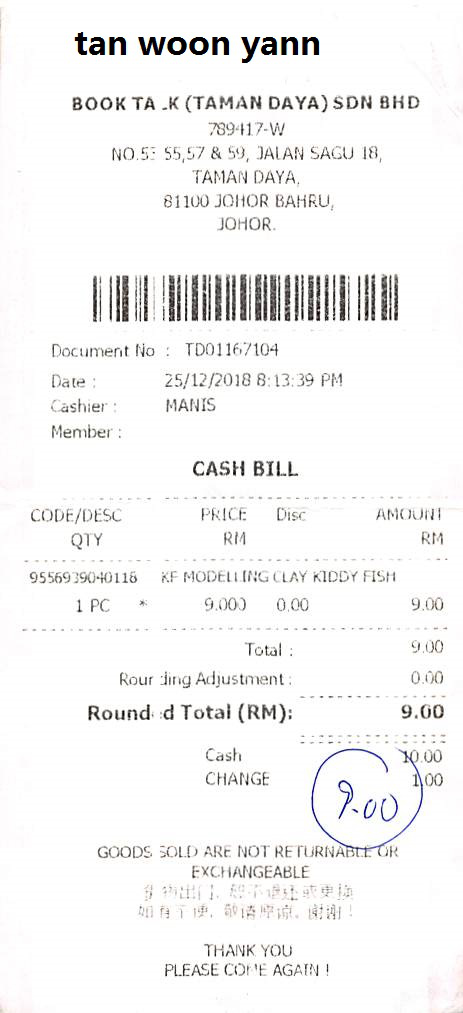

In [ ]:
im

In [ ]:
import cv2
import numpy as np

large = cv2.imread(os.path.join(file_path,"X00016469612.jpg"))
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#For opencv 3+ comment the previous line and uncomment the following line
#_, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

mask = np.zeros(bw.shape, dtype=np.uint8)

for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)



In [ ]:
x1, y2, w3, h4 = cv2.boundingRect(contours[0])
print(x1,y2,w3,h4)

82 481 84 9


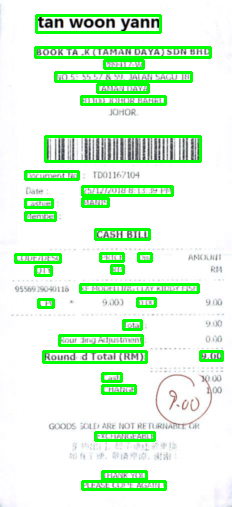

In [ ]:
img = Image.fromarray(rgb, 'RGB')
img.save('my.png')
img

In [59]:
def get_coord(other_axis, axis_size):
        # get "x-y" coordinates:
        g_c_prob = tf.reduce_mean(x, axis=other_axis)  # B,W,NMAP
        g_c_prob = tf.nn.softmax(g_c_prob, axis=1)  # B,W,NMAP
        g_c_prob = tf.cast(g_c_prob,tf.float32)
        #coord_pt = tf.to_float(tf.linspace(-1.0, 1.0, axis_size)) # W
        #tf.dtypes.cast(scores,tf.float32)
        coord_pt = tf.dtypes.cast(tf.linspace(-1.0, 1.0, axis_size),tf.float32) # W
        coord_pt = tf.reshape(coord_pt, [1, axis_size, 1])
        g_c = tf.reduce_sum(g_c_prob * coord_pt, axis=1)
        return g_c, g_c_prob

In [15]:
import torch
import torch.nn.functional as F

In [ ]:
F.

In [7]:
import math
import numpy as np
def gaussian(xL, yL, H, W, sigma=2):

    channel = [math.exp(-((c - xL) ** 2 + (r - yL) ** 2) / (2 * sigma ** 2)) for r in range(H) for c in range(W)]
    channel = np.array(channel, dtype=np.float32)
    channel = np.reshape(channel, newshape=(H, W))

    return channel

In [14]:
heatmap = gaussian(3,2, 5, 5)

In [35]:
heatmap<0.6,


(array([[ True,  True,  True, False,  True],
        [ True,  True, False, False, False],
        [ True, False, False, False, False],
        [ True,  True, False, False, False],
        [ True,  True,  True, False,  True]]),
 0,
 array([[0.19691168, 0.36787945, 0.53526145, 0.60653067, 0.53526145],
        [0.2865048 , 0.53526145, 0.7788008 , 0.8824969 , 0.7788008 ],
        [0.32465246, 0.60653067, 0.8824969 , 1.        , 0.8824969 ],
        [0.2865048 , 0.53526145, 0.7788008 , 0.8824969 , 0.7788008 ],
        [0.19691168, 0.36787945, 0.53526145, 0.60653067, 0.53526145]],
       dtype=float32))

In [44]:
import math
def gaussian(xL, yL, H, W, sigma=5):

    channel = [math.exp(-((c - xL) ** 2 + (r - yL) ** 2) / (2 * sigma ** 2)) for r in range(H) for c in range(W)]
    channel = np.array(channel, dtype=np.float32)
    channel = np.reshape(channel, newshape=(H, W))

    return channel

In [46]:
ht = gaussian(10,10, 32, 32)

In [47]:
ht.shape

(32, 32)

In [12]:
import numpy as np
ht =    np.array(     [[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0. ],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],
        [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0. ],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]])
ht.shape

(2, 5, 5)

In [93]:
x  = np.array([[
  [[0.], [0.], [0.], [0.], [0.]],
  [[0.], [0.], [0.], [0.], [0.]],
  [[0.], [0.], [0.], [1.], [0.]],
  [[0.], [0.], [0.], [0.], [0.]],
  [[0.], [0.], [0.], [0.], [0.]],]])
x.shape

(1, 5, 5, 1)

In [56]:
kernel_in = np.array([
 [ [[2, 0.1]], [[3, 0.2]] ],
 [ [[0, 0.3]],[[1, 0.4]] ], ])
x = tf.constant(x_in, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding='VALID')

<tf.Tensor: shape=(1, 4, 4, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]]], dtype=float32)>

In [18]:
htt = torch.tensor(ht)

In [19]:
torch.mean(htt,1)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2000]], dtype=torch.float64)

In [20]:
import tensorflow as tf
tf.reduce_mean(ht,1)

<tf.Tensor: shape=(2, 5), dtype=float64, numpy=
array([[0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2]])>

In [21]:
x = tf.expand_dims(ht, 0)

In [24]:
x.shape

TensorShape([1, 2, 5, 5])

In [31]:
xt = torch.unsqueeze(htt, 0)

In [32]:
xt.shape

torch.Size([1, 2, 5, 5])

In [54]:
xt.shape[1]

5

In [50]:
x = tf.expand_dims(x, 3)

In [51]:
x.shape

TensorShape([1, 32, 32, 1])

In [2]:
x

NameError: ignored

In [89]:
x.shape

TensorShape([1, 2, 5, 5])

In [13]:
#x

In [12]:
#x = tf.expand_dims(x,3)

In [79]:
heatmap

array([[0.19691168, 0.36787945, 0.53526145, 0.60653067, 0.53526145],
       [0.2865048 , 0.53526145, 0.7788008 , 0.8824969 , 0.7788008 ],
       [0.32465246, 0.60653067, 0.8824969 , 1.        , 0.8824969 ],
       [0.2865048 , 0.53526145, 0.7788008 , 0.8824969 , 0.7788008 ],
       [0.19691168, 0.36787945, 0.53526145, 0.60653067, 0.53526145]],
      dtype=float32)

In [5]:
import tensorflow as tf
x = tf.expand_dims(ht, 0)
#x = tf.expand_dims(x, 3)

In [117]:
#x = tf.expand_dims(x, 3)

In [6]:
x.shape

TensorShape([1, 2, 5, 5])

In [26]:
x = tf.transpose(x, perm=[0, 2, 3,1])
x.shape

TensorShape([1, 5, 5, 2])

In [33]:
xt = xt.permute([0,2,3,1])

In [34]:
xt.shape

torch.Size([1, 5, 5, 2])

In [57]:
x.shape.as_list()

[1, 32, 32, 1]

In [29]:
m = tf.reduce_mean(x,2)
m

<tf.Tensor: shape=(1, 5, 2), dtype=float64, numpy=
array([[[0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0. ],
        [0. , 0.2]]])>

In [35]:
mt = torch.mean(xt,2)
mt

tensor([[[0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.0000],
         [0.0000, 0.2000]]], dtype=torch.float64)

In [36]:
s = tf.nn.softmax(m,axis=1)
s

<tf.Tensor: shape=(1, 5, 2), dtype=float64, numpy=
array([[[0.2       , 0.19151941],
        [0.2       , 0.19151941],
        [0.2       , 0.19151941],
        [0.2       , 0.19151941],
        [0.2       , 0.23392234]]])>

In [38]:
st = F.softmax(mt,dim=1)
st

tensor([[[0.2000, 0.1915],
         [0.2000, 0.1915],
         [0.2000, 0.1915],
         [0.2000, 0.1915],
         [0.2000, 0.2339]]], dtype=torch.float64)

In [46]:
coord_pt = tf.dtypes.cast(tf.linspace(-1.0, 1.0, 5),tf.float32) # W
print(coord_pt)
coord_pt = tf.reshape(coord_pt, [1, 5, 1])
print(coord_pt)

tf.Tensor([-1.  -0.5  0.   0.5  1. ], shape=(5,), dtype=float32)
tf.Tensor(
[[[-1. ]
  [-0.5]
  [ 0. ]
  [ 0.5]
  [ 1. ]]], shape=(1, 5, 1), dtype=float32)


In [41]:
coord_ptt = torch.linspace(-1.0, 1.0, 5)

In [43]:
coord_ptt = coord_ptt.view([1,5,1])

In [44]:
coord_ptt

tensor([[[-1.0000],
         [-0.5000],
         [ 0.0000],
         [ 0.5000],
         [ 1.0000]]])

In [11]:
s

<tf.Tensor: shape=(1, 5, 2), dtype=float32, numpy=
array([[[0.19151941, 0.23392235],
        [0.19151941, 0.19151941],
        [0.23392235, 0.19151941],
        [0.19151941, 0.19151941],
        [0.19151941, 0.19151941]]], dtype=float32)>

In [14]:
0.19151941*-1+0.19151941*0.5+0.23392235*0+0.19151941*0.5+0.19151941*1

0.19151941

In [16]:
0.19151941*0.5

0.095759705

In [48]:
s = tf.cast(s,tf.float32)
coord_pt = tf.cast(coord_pt,tf.float32)
rs = s * coord_pt

In [49]:
rs

<tf.Tensor: shape=(1, 5, 2), dtype=float32, numpy=
array([[[-0.2       , -0.19151941],
        [-0.1       , -0.0957597 ],
        [ 0.        ,  0.        ],
        [ 0.1       ,  0.0957597 ],
        [ 0.2       ,  0.23392235]]], dtype=float32)>

In [50]:
rst = st * coord_ptt
rst

tensor([[[-0.2000, -0.1915],
         [-0.1000, -0.0958],
         [ 0.0000,  0.0000],
         [ 0.1000,  0.0958],
         [ 0.2000,  0.2339]]], dtype=torch.float64)

In [52]:
tf.reduce_sum(rs,axis=1)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-1.4901161e-08,  4.2402923e-02]], dtype=float32)>

In [53]:
torch.sum(rst,axis=1)

tensor([[-2.7756e-17,  4.2403e-02]], dtype=torch.float64)

In [25]:
-0.23392235-0.0957597+0+0.0957597+0.19151941

-0.04240294

In [24]:
tf.reduce_sum(rs,axis=1)*100

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-1.4901161e-06, -4.2402940e+00]], dtype=float32)>

In [17]:
-0.19151941-0.0957597+0+0.0957597+0.19151941

0.0

In [10]:
#s * coord_pt
s = tf.cast(s,tf.float32)
coord_pt = tf.cast(coord_pt,tf.float32)
print(coord_pt)
g_c = tf.reduce_sum(s * coord_pt, axis=1)
print(g_c)

tf.Tensor(
[[[-1. ]
  [-0.5]
  [ 0. ]
  [ 0.5]
  [ 1. ]]], shape=(1, 5, 1), dtype=float32)
tf.Tensor([[-1.4901161e-08 -4.2402938e-02]], shape=(1, 2), dtype=float32)


In [129]:
g_c*100000000

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-1.4901161e+00, -4.2402940e+06]], dtype=float32)>

In [60]:
xshape = x.shape.as_list()
gauss_y, gauss_y_prob  = get_coord(2, xshape[1])

In [61]:
gauss_y_prob

<tf.Tensor: shape=(1, 5, 2), dtype=float32, numpy=
array([[[0.2       , 0.19151941],
        [0.2       , 0.19151941],
        [0.2       , 0.19151941],
        [0.2       , 0.19151941],
        [0.2       , 0.23392235]]], dtype=float32)>

In [96]:
print(gauss_y*100000)

tf.Tensor([[-1.4901161e-03 -4.2402939e+03]], shape=(1, 2), dtype=float32)


In [62]:
xshape = x.shape.as_list()
gauss_x, gauss_x_prob  = get_coord(1, xshape[2])

In [63]:
gauss_x_prob

<tf.Tensor: shape=(1, 5, 2), dtype=float32, numpy=
array([[[0.2       , 0.19151941],
        [0.2       , 0.19151941],
        [0.2       , 0.19151941],
        [0.2       , 0.19151941],
        [0.2       , 0.23392235]]], dtype=float32)>

In [64]:
#gauss_x_prob*coord_pt

In [65]:
gauss_x

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.04993543]], dtype=float32)>

In [66]:
print(gauss_x*1000)

tf.Tensor([[-49.93543]], shape=(1, 1), dtype=float32)


In [64]:
gauss_mu = tf.stack([gauss_y, gauss_x], axis=2)

In [85]:
gauss_mu

<tf.Tensor: shape=(1, 2, 2), dtype=float32, numpy=
array([[[-1.4901161e-08, -1.4901161e-08],
        [ 4.2402923e-02,  4.2402923e-02]]], dtype=float32)>

In [86]:
def get_coordt(x,other_axis, axis_size):
        # get "x-y" coordinates:
        g_c_prob = torch.mean(x, axis=other_axis)  # B,W,NMAP
        g_c_prob = F.softmax(g_c_prob, dim=1)  # B,W,NMAP
        coord_pt = torch.linspace(-1.0, 1.0, axis_size) # W
        coord_pt = coord_pt.view([1, axis_size, 1])
        g_c = torch.sum(g_c_prob * coord_pt, axis=1)
        return g_c, g_c_prob


In [87]:
gauss_yt, gauss_y_probt  = get_coordt(xt,2, xshape[1])
gauss_xt, gauss_x_probt  = get_coordt(xt,1, xshape[2])

In [94]:
gauss_y

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-1.4901161e-08,  4.2402923e-02]], dtype=float32)>

In [93]:
gauss_yt

tensor([[-2.7756e-17,  4.2403e-02]], dtype=torch.float64)

In [95]:
gauss_x,gauss_xt

(<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-1.4901161e-08,  4.2402923e-02]], dtype=float32)>,
 tensor([[-2.7756e-17,  4.2403e-02]], dtype=torch.float64))

In [96]:
gauss_mut = torch.stack([gauss_yt, gauss_xt], axis=2)

In [97]:
gauss_mut

tensor([[[-2.7756e-17, -2.7756e-17],
         [ 4.2403e-02,  4.2403e-02]]], dtype=torch.float64)

In [98]:
gauss_mu

<tf.Tensor: shape=(1, 2, 2), dtype=float32, numpy=
array([[[-1.4901161e-08, -1.4901161e-08],
        [ 4.2402923e-02,  4.2402923e-02]]], dtype=float32)>

In [82]:
hw = (5,5)

In [83]:
hw[0]

5

In [102]:
gauss_mut

tensor([[[-2.7756e-17, -2.7756e-17],
         [ 4.2403e-02,  4.2403e-02]]], dtype=torch.float64)

In [108]:
gauss_mu

<tf.Tensor: shape=(1, 2, 2), dtype=float32, numpy=
array([[[-1.4901161e-08, -1.4901161e-08],
        [ 4.2402923e-02,  4.2402923e-02]]], dtype=float32)>

In [106]:
gauss_mu[:,:,0:1]

<tf.Tensor: shape=(1, 2, 1), dtype=float32, numpy=
array([[[-1.4901161e-08],
        [ 4.2402923e-02]]], dtype=float32)>

In [109]:
gauss_mut

tensor([[[-2.7756e-17, -2.7756e-17],
         [ 4.2403e-02,  4.2403e-02]]], dtype=torch.float64)

In [115]:
mu_yt, mu_xt = gauss_mut[:, :, 0:1], gauss_mut[:, :, 1:2]

In [101]:
mu_y

tensor([[[-2.7756e-17],
         [ 4.2403e-02]]], dtype=torch.float64)

In [171]:
mu_x

<tf.Tensor: shape=(1, 2, 1), dtype=float32, numpy=
array([[[-1.4901161e-08],
        [ 4.2402923e-02]]], dtype=float32)>

In [116]:
mu_y, mu_x = gauss_mu[:, :, 0:1], gauss_mu[:, :, 1:2]

y = tf.cast(tf.linspace(-1.0, 1.0, shape_hw[0]),tf.float32)

x = tf.cast(tf.linspace(-1.0, 1.0, shape_hw[1]),tf.float32)


In [168]:
y = tf.reshape(y, [1, 1, shape_hw[0]])
print(y)
print(y.shape)
x = tf.reshape(x, [1, 1, shape_hw[1]])
print(x)
print(x.shape)
g_y = tf.exp(-tf.sqrt(1e-4 + tf.abs((mu_y - y) * 0.1)))
print(g_y)
print(g_y.shape)
g_x = tf.exp(-tf.sqrt(1e-4 + tf.abs((mu_x - x) * 0.1)))
print(g_x)
print(g_x.shape)

tf.Tensor([[[-1.  -0.5  0.   0.5  1. ]]], shape=(1, 1, 5), dtype=float32)
(1, 1, 5)
tf.Tensor([[[-1.  -0.5  0.   0.5  1. ]]], shape=(1, 1, 5), dtype=float32)
(1, 1, 5)
tf.Tensor(
[[[0.7287782  0.7994508  0.9900498  0.7994508  0.7287782 ]
  [0.7239612  0.7920664  0.9362424  0.8072282  0.73373145]]], shape=(1, 2, 5), dtype=float32)
(1, 2, 5)
tf.Tensor(
[[[0.7287782  0.7994508  0.9900498  0.7994508  0.7287782 ]
  [0.7239612  0.7920664  0.9362424  0.8072282  0.73373145]]], shape=(1, 2, 5), dtype=float32)
(1, 2, 5)


In [169]:
g_y = tf.expand_dims(g_y, axis=3)
print(g_y)
print(g_y.shape)
g_x = tf.expand_dims(g_x, axis=2)
print(g_x)
print(g_x.shape)

tf.Tensor(
[[[[0.7287782 ]
   [0.7994508 ]
   [0.9900498 ]
   [0.7994508 ]
   [0.7287782 ]]

  [[0.7239612 ]
   [0.7920664 ]
   [0.9362424 ]
   [0.8072282 ]
   [0.73373145]]]], shape=(1, 2, 5, 1), dtype=float32)
(1, 2, 5, 1)
tf.Tensor(
[[[[0.7287782  0.7994508  0.9900498  0.7994508  0.7287782 ]]

  [[0.7239612  0.7920664  0.9362424  0.8072282  0.73373145]]]], shape=(1, 2, 1, 5), dtype=float32)
(1, 2, 1, 5)


In [170]:
g_yx = tf.matmul(g_y, g_x)  # [B, NMAPS, H, W]
print(g_yx)
print(g_yx.shape)

tf.Tensor(
[[[[0.5311176  0.5826223  0.7215267  0.5826223  0.5311176 ]
   [0.5826223  0.6391216  0.7914961  0.6391216  0.5826223 ]
   [0.7215267  0.7914961  0.98019856 0.7914961  0.7215267 ]
   [0.5826223  0.6391216  0.7914961  0.6391216  0.5826223 ]
   [0.5311176  0.5826223  0.7215267  0.5826223  0.5311176 ]]

  [[0.5241198  0.5734253  0.67780316 0.5844019  0.5311931 ]
   [0.5734253  0.62736917 0.7415661  0.6393783  0.581164  ]
   [0.67780316 0.7415661  0.87654984 0.75576127 0.6869505 ]
   [0.5844019  0.6393783  0.75576127 0.6516174  0.59228873]
   [0.5311931  0.581164   0.6869505  0.59228873 0.53836185]]]], shape=(1, 2, 5, 5), dtype=float32)
(1, 2, 5, 5)


In [183]:
tf.transpose(g_yx, perm=[0, 2, 3, 1])

<tf.Tensor: shape=(1, 5, 5, 2), dtype=float32, numpy=
array([[[[0.5311176 , 0.5241198 ],
         [0.5826223 , 0.5734253 ],
         [0.7215267 , 0.67780316],
         [0.5826223 , 0.5844019 ],
         [0.5311176 , 0.5311931 ]],

        [[0.5826223 , 0.5734253 ],
         [0.6391216 , 0.62736917],
         [0.7914961 , 0.7415661 ],
         [0.6391216 , 0.6393783 ],
         [0.5826223 , 0.581164  ]],

        [[0.7215267 , 0.67780316],
         [0.7914961 , 0.7415661 ],
         [0.98019856, 0.87654984],
         [0.7914961 , 0.75576127],
         [0.7215267 , 0.6869505 ]],

        [[0.5826223 , 0.5844019 ],
         [0.6391216 , 0.6393783 ],
         [0.7914961 , 0.75576127],
         [0.6391216 , 0.6516174 ],
         [0.5826223 , 0.59228873]],

        [[0.5311176 , 0.5311931 ],
         [0.5826223 , 0.581164  ],
         [0.7215267 , 0.6869505 ],
         [0.5826223 , 0.59228873],
         [0.5311176 , 0.53836185]]]], dtype=float32)>

In [175]:
g_yx_to

tensor([[[[0.5311, 0.5826, 0.7215, 0.5826, 0.5311],
          [0.5826, 0.6391, 0.7915, 0.6391, 0.5826],
          [0.7215, 0.7915, 0.9802, 0.7915, 0.7215],
          [0.5826, 0.6391, 0.7915, 0.6391, 0.5826],
          [0.5311, 0.5826, 0.7215, 0.5826, 0.5311]],

         [[0.5241, 0.5734, 0.6778, 0.5844, 0.5312],
          [0.5734, 0.6274, 0.7416, 0.6394, 0.5812],
          [0.6778, 0.7416, 0.8765, 0.7558, 0.6870],
          [0.5844, 0.6394, 0.7558, 0.6516, 0.5923],
          [0.5312, 0.5812, 0.6870, 0.5923, 0.5384]]]], dtype=torch.float64)

In [188]:
g_yx_to

tensor([[[[0.5311, 0.5826, 0.7215, 0.5826, 0.5311],
          [0.5826, 0.6391, 0.7915, 0.6391, 0.5826],
          [0.7215, 0.7915, 0.9802, 0.7915, 0.7215],
          [0.5826, 0.6391, 0.7915, 0.6391, 0.5826],
          [0.5311, 0.5826, 0.7215, 0.5826, 0.5311]],

         [[0.5241, 0.5734, 0.6778, 0.5844, 0.5312],
          [0.5734, 0.6274, 0.7416, 0.6394, 0.5812],
          [0.6778, 0.7416, 0.8765, 0.7558, 0.6870],
          [0.5844, 0.6394, 0.7558, 0.6516, 0.5923],
          [0.5312, 0.5812, 0.6870, 0.5923, 0.5384]]]], dtype=torch.float64)

In [192]:
g_yx_to

tensor([[[[0.5311, 0.5826, 0.7215, 0.5826, 0.5311],
          [0.5826, 0.6391, 0.7915, 0.6391, 0.5826],
          [0.7215, 0.7915, 0.9802, 0.7915, 0.7215],
          [0.5826, 0.6391, 0.7915, 0.6391, 0.5826],
          [0.5311, 0.5826, 0.7215, 0.5826, 0.5311]],

         [[0.5241, 0.5734, 0.6778, 0.5844, 0.5312],
          [0.5734, 0.6274, 0.7416, 0.6394, 0.5812],
          [0.6778, 0.7416, 0.8765, 0.7558, 0.6870],
          [0.5844, 0.6394, 0.7558, 0.6516, 0.5923],
          [0.5312, 0.5812, 0.6870, 0.5923, 0.5384]]]], dtype=torch.float64)

In [193]:
import torch
g_yx_toy = torch.tensor(g_yx_to).permute([0,2,3,1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [195]:
g_yx_toy.shape

torch.Size([1, 5, 5, 2])

In [200]:
g_yx_to.shape

torch.Size([1, 2, 5, 5])

In [202]:
torch.transpose(g_yx_to,0,0).shape

torch.Size([1, 2, 5, 5])

In [194]:
g_yx_toy

tensor([[[[0.5311, 0.5241],
          [0.5826, 0.5734],
          [0.7215, 0.6778],
          [0.5826, 0.5844],
          [0.5311, 0.5312]],

         [[0.5826, 0.5734],
          [0.6391, 0.6274],
          [0.7915, 0.7416],
          [0.6391, 0.6394],
          [0.5826, 0.5812]],

         [[0.7215, 0.6778],
          [0.7915, 0.7416],
          [0.9802, 0.8765],
          [0.7915, 0.7558],
          [0.7215, 0.6870]],

         [[0.5826, 0.5844],
          [0.6391, 0.6394],
          [0.7915, 0.7558],
          [0.6391, 0.6516],
          [0.5826, 0.5923]],

         [[0.5311, 0.5312],
          [0.5826, 0.5812],
          [0.7215, 0.6870],
          [0.5826, 0.5923],
          [0.5311, 0.5384]]]], dtype=torch.float64)

In [176]:
g_yx_to.shape

torch.Size([1, 2, 5, 5])

In [123]:
mu_y,y

(<tf.Tensor: shape=(1, 2, 1), dtype=float32, numpy=
 array([[[-1.4901161e-08],
         [ 4.2402923e-02]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1, 5), dtype=float32, numpy=array([[[-1. , -0.5,  0. ,  0.5,  1. ]]], dtype=float32)>)

In [165]:
tf.abs(-1 - y)

<tf.Tensor: shape=(1, 1, 5), dtype=float32, numpy=array([[[0. , 0.5, 1. , 1.5, 2. ]]], dtype=float32)>

In [167]:
tf.exp(-(tf.sqrt(1e-10 + tf.abs((1 - y)))))

<tf.Tensor: shape=(1, 1, 5), dtype=float32, numpy=
array([[[0.24311674, 0.29383263, 0.36787945, 0.4930687 , 0.9999899 ]]],
      dtype=float32)>

In [155]:
tf.exp(-(tf.sqrt(1e-10 + tf.abs((mu_y - y)))))

<tf.Tensor: shape=(1, 2, 5), dtype=float32, numpy=
array([[[0.36787945, 0.4930687 , 0.9998775 , 0.4930687 , 0.36787945],
        [0.36024123, 0.47879624, 0.8138984 , 0.508414  , 0.3758486 ]]],
      dtype=float32)>

In [124]:
tf.abs((mu_x - x))

<tf.Tensor: shape=(1, 2, 5), dtype=float32, numpy=
array([[[1.0000000e+00, 5.0000000e-01, 1.4901161e-08, 5.0000000e-01,
         1.0000000e+00],
        [1.0424030e+00, 5.4240292e-01, 4.2402923e-02, 4.5759708e-01,
         9.5759708e-01]]], dtype=float32)>

In [203]:
shape_hw = (5,5)
yto = torch.linspace(-1.0, 1.0, shape_hw[0])
print(y)
xto = torch.linspace(-1.0, 1.0, shape_hw[1])
print(xto)
yto = yto.reshape([1, 1, shape_hw[0]])
print(y.shape)
xto = yto.reshape([1, 1, shape_hw[1]])
print(xto)
print(xto.shape)

tf.Tensor([[[-1.  -0.5  0.   0.5  1. ]]], shape=(1, 1, 5), dtype=float32)
tensor([-1.0000, -0.5000,  0.0000,  0.5000,  1.0000])
(1, 1, 5)
tensor([[[-1.0000, -0.5000,  0.0000,  0.5000,  1.0000]]])
torch.Size([1, 1, 5])


In [204]:
g_yto = torch.exp(-torch.sqrt(1e-4+torch.abs((mu_yt-yto)*0.1)))
g_xto = torch.exp(-torch.sqrt(1e-4+torch.abs((mu_xt-xto)*0.1)))

In [205]:
g_yto = torch.unsqueeze(g_yto,dim=3)
g_xto = torch.unsqueeze(g_xto,dim=2)
g_yx_to = torch.matmul(g_yto,g_xto)

In [206]:
g_yx_to

tensor([[[[0.5311, 0.5826, 0.7215, 0.5826, 0.5311],
          [0.5826, 0.6391, 0.7915, 0.6391, 0.5826],
          [0.7215, 0.7915, 0.9802, 0.7915, 0.7215],
          [0.5826, 0.6391, 0.7915, 0.6391, 0.5826],
          [0.5311, 0.5826, 0.7215, 0.5826, 0.5311]],

         [[0.5241, 0.5734, 0.6778, 0.5844, 0.5312],
          [0.5734, 0.6274, 0.7416, 0.6394, 0.5812],
          [0.6778, 0.7416, 0.8765, 0.7558, 0.6870],
          [0.5844, 0.6394, 0.7558, 0.6516, 0.5923],
          [0.5312, 0.5812, 0.6870, 0.5923, 0.5384]]]], dtype=torch.float64)

In [210]:
g_yx_to.shape

torch.Size([1, 2, 5, 5])

In [211]:
ertx = torch.randn((1,3, 5, 5))
ertx

tensor([[[[ 0.6217,  1.2792,  1.6007,  0.3490, -0.7955],
          [ 0.1507, -1.5241, -0.3624, -0.4399, -0.2161],
          [ 1.4447, -1.2001,  0.8080, -0.4318, -1.2461],
          [ 0.4285,  1.1611, -1.0518,  2.1145,  0.7872],
          [-1.4728, -0.3092,  0.0747, -0.1508, -0.4859]],

         [[-0.3683,  0.7750, -1.0763, -2.3083,  1.4074],
          [-1.1339,  0.2433,  0.3070, -0.0884, -1.5899],
          [ 1.5300,  0.3530,  1.3736, -0.6351,  0.0765],
          [ 0.5576,  0.0671,  1.4399,  0.5182,  0.8415],
          [-1.4145,  0.6936, -1.2570,  0.0522,  1.2532]],

         [[-0.6980,  0.6065, -0.2690, -1.3318, -0.1763],
          [ 0.2403,  0.0112,  1.4163, -0.0574, -0.5287],
          [-0.8132, -0.1019, -0.3917, -0.0861, -2.2199],
          [ 0.6411, -0.9964,  0.2061,  1.2693, -0.8447],
          [-0.0483,  0.3625, -0.6517, -1.0936, -1.4237]]]])

In [212]:
ertx.shape

torch.Size([1, 3, 5, 5])

In [207]:
g_yx

<tf.Tensor: shape=(1, 2, 5, 5), dtype=float32, numpy=
array([[[[0.5311176 , 0.5826223 , 0.7215267 , 0.5826223 , 0.5311176 ],
         [0.5826223 , 0.6391216 , 0.7914961 , 0.6391216 , 0.5826223 ],
         [0.7215267 , 0.7914961 , 0.98019856, 0.7914961 , 0.7215267 ],
         [0.5826223 , 0.6391216 , 0.7914961 , 0.6391216 , 0.5826223 ],
         [0.5311176 , 0.5826223 , 0.7215267 , 0.5826223 , 0.5311176 ]],

        [[0.5241198 , 0.5734253 , 0.67780316, 0.5844019 , 0.5311931 ],
         [0.5734253 , 0.62736917, 0.7415661 , 0.6393783 , 0.581164  ],
         [0.67780316, 0.7415661 , 0.87654984, 0.75576127, 0.6869505 ],
         [0.5844019 , 0.6393783 , 0.75576127, 0.6516174 , 0.59228873],
         [0.5311931 , 0.581164  , 0.6869505 , 0.59228873, 0.53836185]]]],
      dtype=float32)>

In [209]:
#g_y = tf.exp(-tf.sqrt(1e-40 + tf.abs((mu_y - y) * inv_std)))
#g_x = tf.exp(-tf.sqrt(1e-40 + tf.abs((mu_x - x) * inv_std)))

In [ ]:
g_y = tf.expand_dims(g_y, axis=3)
g_x = tf.expand_dims(g_x, axis=2)
g_yx = tf.matmul(g_y, g_x)

In [66]:
def get_gaussian_maps(mu, shape_hw, inv_std, mode='ankush'):
  """
  Generates [B,SHAPE_H,SHAPE_W,NMAPS] tensor of 2D gaussians,
  given the gaussian centers: MU [B, NMAPS, 2] tensor.

  STD: is the fixed standard dev.
  """
  with tf.name_scope('Nonanme'):
    mu_y, mu_x = mu[:, :, 0:1], mu[:, :, 1:2]

    y = tf.cast(tf.linspace(-1.0, 1.0, shape_hw[0]),tf.float32)

    x = tf.cast(tf.linspace(-1.0, 1.0, shape_hw[1]),tf.float32)

  if mode in ['rot', 'flat']:
    mu_y, mu_x = tf.expand_dims(mu_y, -1), tf.expand_dims(mu_x, -1)

    y = tf.reshape(y, [1, 1, shape_hw[0], 1])
    x = tf.reshape(x, [1, 1, 1, shape_hw[1]])

    g_y = tf.square(y - mu_y)
    g_x = tf.square(x - mu_x)
    dist = (g_y + g_x) * inv_std**2

    if mode == 'rot':
      g_yx = tf.exp(-dist)
    else:
      g_yx = tf.exp(-tf.pow(dist + 1e-5, 0.25))

  elif mode == 'ankush':
    y = tf.reshape(y, [1, 1, shape_hw[0]])
    x = tf.reshape(x, [1, 1, shape_hw[1]])

    g_y = tf.exp(-tf.sqrt(1e-40 + tf.abs((mu_y - y) * inv_std)))
    g_x = tf.exp(-tf.sqrt(1e-40 + tf.abs((mu_x - x) * inv_std)))

    g_y = tf.expand_dims(g_y, axis=3)
    g_x = tf.expand_dims(g_x, axis=2)
    g_yx = tf.matmul(g_y, g_x)  # [B, NMAPS, H, W]

  else:
    raise ValueError('Unknown mode: ' + str(mode))

  g_yx = tf.transpose(g_yx, perm=[0, 2, 3, 1])
  return g_yx


In [56]:
1.0/.10

10.0

In [179]:
gauss_mu1 = np.array([[[-1, -1],
        [ 0.2,  0.2]]])
gauss_mu1

array([[[-1. , -1. ],
        [ 0.2,  0.2]]])

In [180]:
gauss_xy_ = get_gaussian_maps(gauss_mu1, [5, 5],
                                      1,
                                      mode='ankush')

In [135]:
#gauss_xy_.shape

In [136]:
#sh = tf.transpose(gauss_xy_,perm=[0,3,2,1])

In [137]:
#sh.shape

In [138]:
import matplotlib.pyplot as plt
import math

In [139]:
#heatmaps[0,:,:,0].shape

In [196]:
gauss_xy_.shape

TensorShape([1, 5, 5, 2])

Text(0.5, 1.0, 'Single Heatmap')

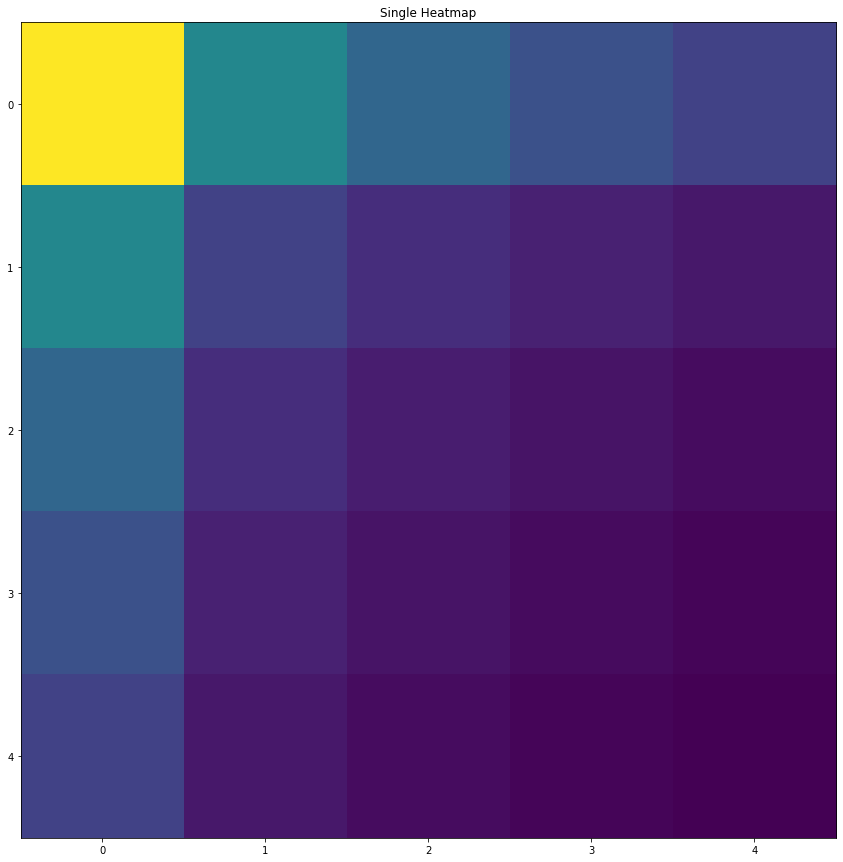

In [181]:
heatmaps = np.array(gauss_xy_)
heatmaps = heatmaps[0,:,:,0]
plt.figure(figsize=(15,15))
plt.imshow(heatmaps)
plt.title("Single Heatmap")

In [141]:
#import numpy as np
#heatmaps = np.array(x)
#heatmaps = heatmaps[0,:,:,1]
#plt.figure(figsize=(15,15))
#plt.imshow(heatmaps)
#plt.title("Single Heatmap")

Text(0.5, 1.0, 'Single Heatmap')

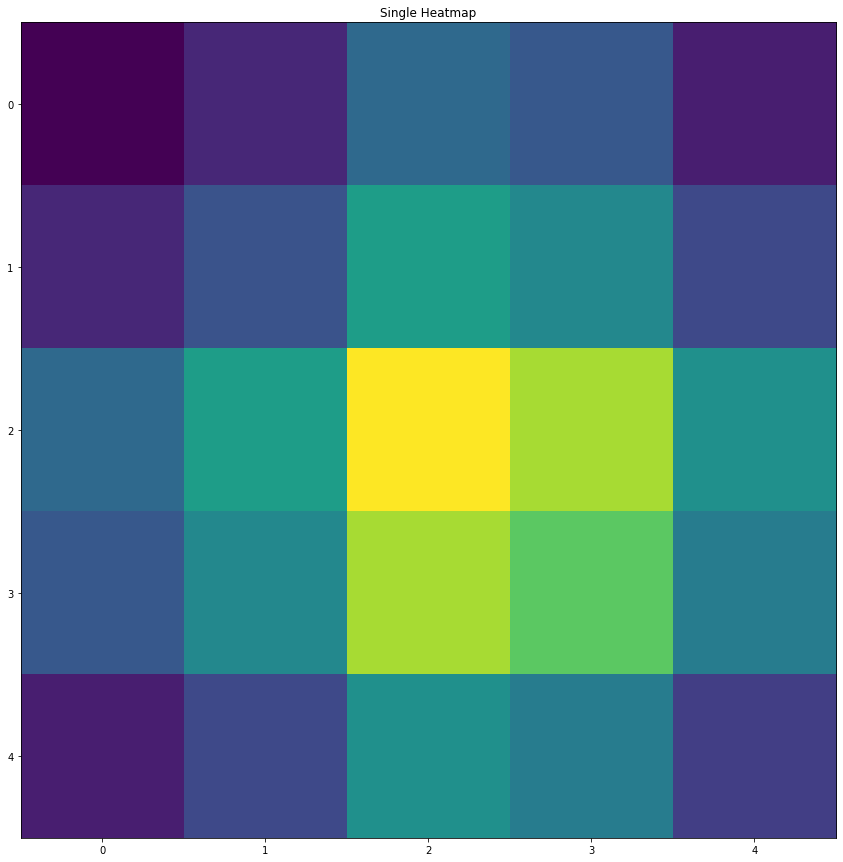

In [182]:
heatmaps = np.array(gauss_xy_)
heatmaps = heatmaps[0,:,:,1]
plt.figure(figsize=(15,15))
plt.imshow(heatmaps)
plt.title("Single Heatmap")

In [143]:
gauss_xy_[0,:,:,0]

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.1353353 , 0.18138984, 0.36783454, 0.18138984, 0.1353353 ],
       [0.18138984, 0.24311674, 0.4930085 , 0.24311674, 0.18138984],
       [0.36783454, 0.4930085 , 0.99975586, 0.4930085 , 0.36783454],
       [0.18138984, 0.24311674, 0.4930085 , 0.24311674, 0.18138984],
       [0.1353353 , 0.18138984, 0.36783454, 0.18138984, 0.1353353 ]],
      dtype=float32)>

In [144]:
gauss_xy_[0,:,:,1]


<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.12977375, 0.17248215, 0.29319975, 0.18315168, 0.13539617],
       [0.17248215, 0.22924584, 0.3896915 , 0.2434267 , 0.17995489],
       [0.29319975, 0.3896915 , 0.6624306 , 0.41379732, 0.30590257],
       [0.18315168, 0.2434267 , 0.41379732, 0.25848475, 0.19108668],
       [0.13539617, 0.17995489, 0.30590257, 0.19108668, 0.14126216]],
      dtype=float32)>

In [84]:
coord_pt = tf.dtypes.cast(tf.linspace(-1.0, 1.0, xshape[1]),tf.float32) # W
coord_pt = tf.reshape(coord_pt, [1, xshape[1], 1])
ch = coord_pt*gauss_y_prob

In [85]:
ch

<tf.Tensor: shape=(1, 5, 5), dtype=float32, numpy=
array([[[-0.17537194, -0.19381596, -0.2616242 , -0.19381596,
         -0.17537194],
        [-0.08768597, -0.09690798, -0.1308121 , -0.09690798,
         -0.08768597],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.08768597,  0.09690798,  0.1308121 ,  0.09690798,
          0.08768597],
        [ 0.17537194,  0.19381596,  0.2616242 ,  0.19381596,
          0.17537194]]], dtype=float32)>

In [77]:
tf.reduce_sum([-0.19151941, 0.5*-0.19151941, 0*-0.23392232, 0.5*-0.19151941,
         1*-0.19151941])

<tf.Tensor: shape=(), dtype=float32, numpy=-0.57455826>

In [74]:
tf.reduce_sum(ch, axis=1)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[-1.4901161e-08, -1.4901161e-08, -1.4901161e-08, -1.4901161e-08,
        -1.4901161e-08]], dtype=float32)>

In [86]:
print(gauss_y*10000)

tf.Tensor([[ 0.         -0.00014901  0.00029802 -0.00014901  0.        ]], shape=(1, 5), dtype=float32)


In [87]:
print(gauss_y_prob*10000)

tf.Tensor([[1753.7195 1938.1597 2616.242  1938.1597 1753.7195]], shape=(1, 5), dtype=float32)


In [88]:
gauss_x, gauss_x_prob  = get_coord(1, xshape[2])

In [89]:
print(gauss_x*10000)

tf.Tensor([[-0.00014901 -0.00014901 -0.00014901  0.         -0.00014901]], shape=(1, 5), dtype=float32)


In [90]:
print(gauss_x_prob*10000)

tf.Tensor([[1753.7196 1753.7196 1938.1597 2616.2422 1938.1597]], shape=(1, 5), dtype=float32)


In [91]:
gauss_mu = tf.stack([gauss_y, gauss_x], axis=2)

In [125]:
gauss_mu*10000

<tf.Tensor: shape=(1, 5, 2), dtype=float32, numpy=
array([[[ 0.        , -0.00014901],
        [-0.00014901, -0.00014901],
        [ 0.00029802, -0.00014901],
        [-0.00014901,  0.        ],
        [ 0.        , -0.00014901]]], dtype=float32)>

In [141]:
def get_gaussian_maps(mu_y, mu_x, shape_hw, inv_std, mode='ankush'):
  """
  Generates [B,SHAPE_H,SHAPE_W,NMAPS] tensor of 2D gaussians,
  given the gaussian centers: MU [B, NMAPS, 2] tensor.

  STD: is the fixed standard dev.
  """
  
  #mu_y, mu_x = mu[:, :, 0:1], mu[:, :, 1:2]

  y = tf.dtypes.cast(tf.linspace(-1.0, 1.0, shape_hw[0]),tf.float32)
  print(y.shape)
  print(y)
  x = tf.dtypes.cast(tf.linspace(-1.0, 1.0, shape_hw[1]),tf.float32)
  
  if mode in ['rot', 'flat']:
    mu_y, mu_x = tf.expand_dims(mu_y, -1), tf.expand_dims(mu_x, -1)

    y = tf.reshape(y, [1, 1, shape_hw[0], 1])
    x = tf.reshape(x, [1, 1, 1, shape_hw[1]])

    g_y = tf.square(y - mu_y)
    g_x = tf.square(x - mu_x)
    dist = (g_y + g_x) * inv_std**2

    if mode == 'rot':
      g_yx = tf.exp(-dist)
    else:
      g_yx = tf.exp(-tf.pow(dist + 1e-5, 0.25))

  elif mode == 'ankush':
    y = tf.reshape(y, [1, 1, shape_hw[0]])
    x = tf.reshape(x, [1, 1, shape_hw[1]])
    print(y)
    print(y.shape)
    g_y = tf.exp(-tf.sqrt(1e-4 + tf.abs((mu_y - y) * inv_std)))
    g_x = tf.exp(-tf.sqrt(1e-4 + tf.abs((mu_x - x) * inv_std)))
    print(g_y)
    print(g_y.shape)
    print(g_x)
    print(g_x.shape)
    g_y = tf.expand_dims(g_y, axis=3)
    g_x = tf.expand_dims(g_x, axis=2)
    g_yx = tf.matmul(g_y, g_x)  # [B, NMAPS, H, W]

  else:
    raise ValueError('Unknown mode: ' + str(mode))

  g_yx = tf.transpose(g_yx, perm=[0, 2, 3, 1])
  return g_yx

In [122]:
1/0.1

10.0

In [140]:
mu_y, mu_x = gauss_mu[:, :, 0:1], gauss_mu[:, :, 1:2]
print(mu_y)
print(mu_x)

tf.Tensor(
[[[-1.4901161e-08]
  [-4.2402938e-02]]], shape=(1, 2, 1), dtype=float32)
tf.Tensor(
[[[ 0.02120146]
  [-0.04240294]]], shape=(1, 2, 1), dtype=float32)


In [142]:
aa = get_gaussian_maps(mu_y,mu_x, [5, 5],(1.0/0.5))

(5,)
tf.Tensor([-1.  -0.5  0.   0.5  1. ], shape=(5,), dtype=float32)
tf.Tensor([[[-1.  -0.5  0.   0.5  1. ]]], shape=(1, 1, 5), dtype=float32)
(1, 1, 5)
tf.Tensor(
[[[0.24310815 0.36786106 0.9900483  0.36786106 0.24310815]
  [0.2505889  0.38415462 0.7472271  0.35289374 0.23600076]]], shape=(1, 2, 5), dtype=float32)
(1, 2, 5)
tf.Tensor(
[[[0.23950966 0.36022362 0.8137009  0.37582937 0.2467999 ]
  [0.2505889  0.38415462 0.7472271  0.35289374 0.23600076]]], shape=(1, 2, 5), dtype=float32)
(1, 2, 5)


In [145]:
tf.transpose(aa, perm=[0, 3,1,2])

<tf.Tensor: shape=(1, 2, 5, 5), dtype=float32, numpy=
array([[[[0.05822675, 0.0875733 , 0.19781733, 0.09136719, 0.05999907],
         [0.08810627, 0.13251224, 0.2993289 , 0.13825299, 0.09078807],
         [0.23712613, 0.3566388 , 0.8056032 , 0.37208924, 0.24434382],
         [0.08810627, 0.13251224, 0.2993289 , 0.13825299, 0.09078807],
         [0.05822675, 0.0875733 , 0.19781733, 0.09136719, 0.05999907]],

        [[0.0627948 , 0.09626488, 0.1872468 , 0.08843125, 0.05913917],
         [0.09626488, 0.14757477, 0.28705072, 0.13556576, 0.09066078],
         [0.1872468 , 0.28705072, 0.5583483 , 0.26369175, 0.17634615],
         [0.08843125, 0.13556576, 0.26369175, 0.12453399, 0.08328319],
         [0.05913917, 0.09066078, 0.17634615, 0.08328319, 0.05569636]]]],
      dtype=float32)>

In [319]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
class ImageEncoder(nn.Module):
    def __init__(self,num_filter):
        super(ImageEncoder, self).__init__()
        self.layers = encoder_block(num_filter)
        self.mod_layers = nn.ModuleList(self.layers)
    def forward(self,x):
        for layer in self.mod_layers:
            x = layer(x)
        return x 

class PoseEncoder(nn.Module):
    def __init__(self,num_filter,nmaps=1,map_sizes=None,gauss_mode='gaus',):
        super(PoseEncoder, self).__init__()
        self.map_sizes = map_sizes
        self.gauss_mode = gauss_mode
        self.layers = encoder_block(num_filter)
        self.mod_layers = nn.ModuleList(self.layers)
        fin_shape = self.layers[-1][0].weight.shape[0]
        self.convf = nn.Conv2d(fin_shape,nmaps,kernel_size=1,stride=1)
    def forward(self,x):
        for layer in self.mod_layers:
            x = layer(x)
        print(x.shape)
        #x = x[-1]
        x = self.convf(x)
        print(x.shape)
        x = x.permute([0,2,3,1])
        gauss_y, gauss_y_prob = self.get_coord(x,2, x.shape[1])  # B,NMAP
        gauss_x, gauss_x_prob = self.get_coord(x,1, x.shape[2])  # B,NMAP
        gauss_mu = torch.stack([gauss_y, gauss_x], axis=2)
        gauss_xy = []
        for map_size in self.map_sizes:
            gauss_xy_ = get_gaussian_maps(gauss_mu, [map_size, map_size],
                                      1.0 / 10,
                                      mode=self.gauss_mode)
        gauss_xy.append(gauss_xy_)
        #gauss_xy  = nn.ModuleList(gauss_xy)
        return  gauss_mu,gauss_xy
    def get_coord(self,x,other_axis, axis_size):
        # get "x-y" coordinates:
        g_c_prob = torch.mean(x, axis=other_axis)  # B,W,NMAP
        g_c_prob = F.softmax(g_c_prob, dim=1)  # B,W,NMAP
        coord_pt = torch.linspace(-1.0, 1.0, axis_size) # W
        coord_pt = coord_pt.view([1, axis_size, 1])
        g_c = torch.sum(g_c_prob * coord_pt, axis=1)
        return g_c, g_c_prob



def conv_block (ni,nf,kernal,stride=1,pad=(3,3),batch_norm=True,activation='ReLu'):
    conv_block =  nn.Sequential(
    nn.Conv2d(in_channels=ni,out_channels=nf,kernel_size=kernal,stride=stride,padding=pad),
    nn.BatchNorm2d(nf),
    nn.ReLU()
    )
    return conv_block

def encoder_block(num_filter):
    filter = num_filter
    layers = []
    conv1 = conv_block(ni=3,nf =filter,kernal=7,stride=1,pad=(3,3))
    conv2 = conv_block(ni=filter,nf=filter,kernal=3,stride=1,pad=(1,1))
    filter1 = filter*2
    conv3 = conv_block(ni=filter,nf=filter1,kernal=3,stride=2,pad=(1,1))
    conv4 = conv_block(ni=filter1,nf=filter1,kernal=3,stride=1,pad=(1,1))
    filter2 = filter1*2
    conv5 = conv_block(ni=filter1,nf=filter2,kernal=3,stride=2,pad=(1,1))
    conv6 = conv_block(ni=filter2,nf=filter2,kernal=3,stride=1,pad=(1,1))
    filter3 = filter2*2
    conv7 = conv_block(ni=filter2,nf=filter3,kernal=3,stride=2,pad=(1,1))
    conv8 = conv_block(ni=filter3,nf=filter3,kernal=3,stride=1,pad=(1,1))
    layers = [conv1,conv2,conv3,conv4,conv5,conv6,conv7,conv8]
    return layers
device = torch.device("cpu")

#with torch.no_grad():
#    y= Encoder(torch.zeros(3,128,128, device=device))
#print(y.shape)
def get_gaussian_maps(mu, shape_hw, inv_std, mode='gaus'):
  
    mu_y, mu_x = mu[:, :, 0:1], mu[:, :, 1:2]

    y = torch.linspace(-1.0, 1.0, shape_hw[0])

    x = torch.linspace(-1.0, 1.0, shape_hw[1])

    if (mode in ['rot', 'flat']):
        mu_y, mu_x = torch.unsqueeze(mu_y, -1), torch.unsqueeze(mu_x, -1)

        y = y.reshape([1, 1, shape_hw[0], 1])
        x = x.reshape([1, 1, 1, shape_hw[1]])

        g_y = torch.square(y - mu_y)
        g_x = torch.square(x - mu_x)
        dist = (g_y + g_x) * inv_std**2

        if mode == 'rot':
            g_yx = torch.exp(-dist)
        else:
            g_yx = torch.exp(-torch.pow(dist + 1e-5, 0.25))

    if mode == 'gaus':
        y = y.reshape([1, 1, shape_hw[0]])
        x = x.reshape([1, 1, shape_hw[1]])
        g_y = torch.exp(-torch.sqrt(1e-4+torch.abs((mu_y-y)*inv_std)))
        g_x = torch.exp(-torch.sqrt(1e-4+torch.abs((mu_x-x)*inv_std)))

        g_y = torch.unsqueeze(g_y, dim=3)
        g_x = torch.unsqueeze(g_x, dim=2)
        g_yx = torch.matmul(g_y, g_x)  # [B, NMAPS, H, W]

    else:
        raise ValueError('Unknown mode: ' + str(mode))

    #g_yx = g_yx.permute([0, 2, 3, 1])
    return g_yx

#print(PoseEncoder(32,10,[128,128]))
#summary(PoseEncoder(32,10,[128,128]), input_size=(3, 128, 128))
#PoseEncoder(32,10,[128,128]
#torch.randn((1,3, 5, 5))
#in = 
ij = torch.randn((2,3, 5, 5))
Net = ImageEncoder(32)

In [320]:
ij = torch.randn((2,3, 128, 128))

In [321]:
re = Net(ij)

In [322]:
re.shape

torch.Size([2, 256, 16, 16])

In [323]:
Net1 = PoseEncoder(32,2,[16])

In [324]:
d,f = Net1(ij)

torch.Size([2, 256, 16, 16])
torch.Size([2, 2, 16, 16])


In [325]:
d.shape

torch.Size([2, 2, 2])

In [326]:
f[0].shape

torch.Size([2, 2, 16, 16])

In [330]:
catc = torch.cat([re,f[0]],dim=1)
catc.shape

torch.Size([2, 258, 16, 16])

In [271]:
len(f)

1